## An unusual ransom (part 1)

#### Apparently, a password is 'written' inside that data, I scatterploted it and couldn't find anything... Can you?

- Find outliers using the [IQR rule](https://en.wikipedia.org/wiki/Quartile#Outliers).
- At first I thought the hidden message is binary-encoded, with $0 \to (x < lo)$ and $1 \to (x > hi)$.
- It is sufficient to simply remove the outliers and scatter plot the cleaned dataset.

**Solution: `leafy`**

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hyperc54/data-puzzles-assets/master/visualisation/chal1/chal_visu_1_q1_data.csv')
df.describe()

,x,y
count,551.000000,551.000000
mean,623.999478,-11.671255
std,5566.478421,3840.950070
min,-45000.000000,-25000.000000
25%,396.674652,-246.490364
50%,544.922363,-203.869583
75%,656.652008,-163.525925
max,55000.000000,40000.000000


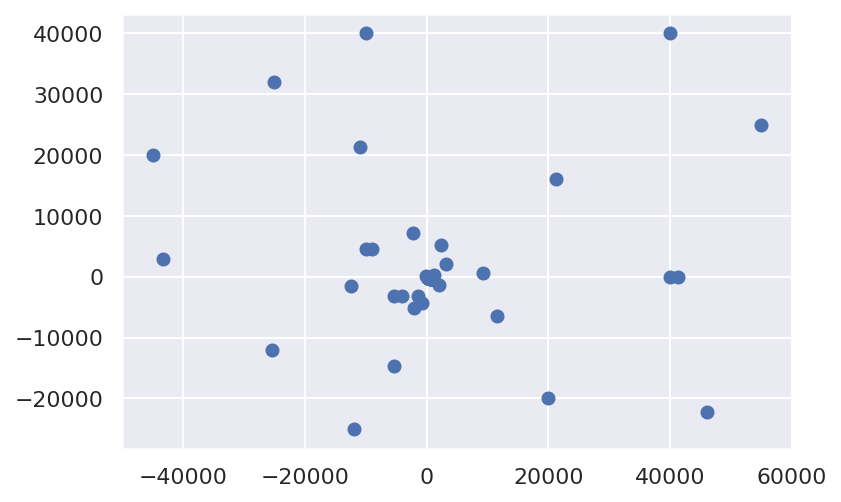

In [3]:
plt.scatter(df.x, df.y)
pass

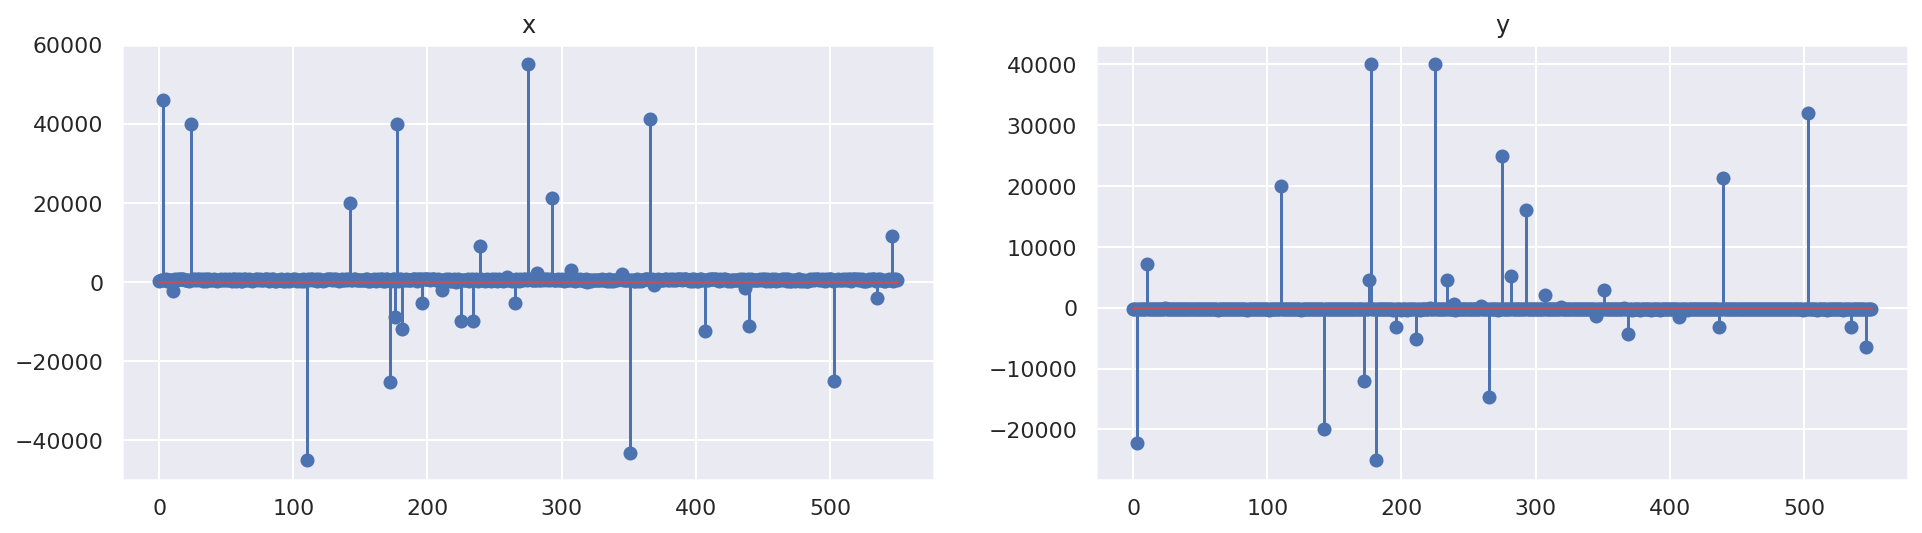

In [4]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.stem(df.x)
plt.title('x')
plt.subplot(1,2,2)
plt.stem(df.y)
plt.title('y')
pass

In [5]:
def bounds(xs):
    q1, q3 = np.quantile(xs, q=[0.25, 0.75])
    iqr = q3 - q1
    
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr

    return lo, hi

def outliers(xs, lo, hi):
    return xs[(xs <= lo) | (xs >= hi)]

def inliers(xs, lo, hi):
    return xs[(lo < xs) & (xs < hi)]

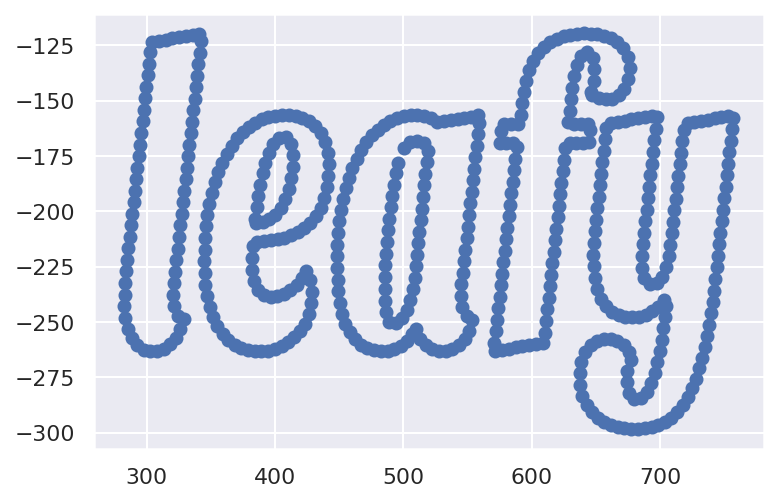

In [6]:
lo_x, hi_x = bounds(df.x)
lo_y, hi_y = bounds(df.y)

plt.scatter(
    inliers(df.x, lo_x, hi_x),
    inliers(df.y, lo_y, hi_y))
pass